In [2]:
# Import the Pandas library
import pandas as pd
# Read the csv file and sort on County_id as the row index
cs = pd.read_csv('datasets/County_stats.csv', index_col='County_id')
cs.sort_index(inplace=True)
cs.head()

,County_name,Former_province,Census_area,Population_2009,Households_2009,Pop_under5,Fertility_rate,Stunted_growth,Crude_death_rate,Pupils_per_teacher,Secondary_enrollment,Pop_urban,Pop_poor,Road_density
County_id,,,,,,,,,,,,,,
1,Mombasa,Coast,218.9,939370,268700,106287,3.2,0.21,8.9,20.9,0.013,1.000,0.376,4.16
2,Kwale,Coast,8270.2,649931,122047,126339,4.7,0.30,10.1,35.3,0.027,0.181,0.729,0.42
3,Kilifi,Coast,12609.7,1109735,199764,138655,5.1,0.40,9.3,33.4,0.025,0.257,0.669,0.30
4,Tana River,Coast,38436.9,240075,47414,43459,5.8,0.28,11.0,38.9,0.015,0.150,0.754,0.08
5,Lamu,Coast,6273.1,101539,22184,12088,4.3,0.29,11.5,22.9,0.037,0.199,0.306,0.14


In [3]:
cs.columns

Index(['County_name', 'Former_province', 'Census_area', 'Population_2009',
       'Households_2009', 'Pop_under5', 'Fertility_rate', 'Stunted_growth',
       'Crude_death_rate', 'Pupils_per_teacher', 'Secondary_enrollment',
       'Pop_urban', 'Pop_poor', 'Road_density'],
      dtype='object')

In [4]:
cs.shape

(47, 14)

In [5]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1 to 47
Data columns (total 14 columns):
County_name             47 non-null object
Former_province         47 non-null object
Census_area             47 non-null float64
Population_2009         47 non-null int64
Households_2009         47 non-null int64
Pop_under5              47 non-null int64
Fertility_rate          47 non-null float64
Stunted_growth          47 non-null float64
Crude_death_rate        47 non-null float64
Pupils_per_teacher      47 non-null float64
Secondary_enrollment    47 non-null float64
Pop_urban               47 non-null float64
Pop_poor                47 non-null float64
Road_density            47 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 5.5+ KB


In [6]:
cs.describe()

,Census_area,Population_2009,Households_2009,Pop_under5,Fertility_rate,Stunted_growth,Crude_death_rate,Pupils_per_teacher,Secondary_enrollment,Pop_urban,Pop_poor,Road_density
count,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,12368.287234,8.214914e+05,186552.212766,104171.957447,4.357447,0.266170,10.610638,30.212766,0.038426,0.258128,0.507936,0.876809
std,17387.573988,5.077810e+05,151470.292010,67519.101541,1.240046,0.069955,2.554556,14.122779,0.018817,0.202852,0.180843,0.871508
min,218.900000,1.015390e+05,22184.000000,12088.000000,2.300000,0.150000,6.300000,15.100000,0.007000,0.066000,0.121000,0.070000
25%,2536.900000,5.413380e+05,106881.500000,60006.500000,3.450000,0.230000,9.300000,21.700000,0.020500,0.143500,0.384000,0.260000
50%,3337.100000,7.529650e+05,154225.000000,92395.000000,4.200000,0.270000,10.200000,25.500000,0.042000,0.181000,0.498000,0.840000
75%,14846.850000,9.663515e+05,205873.000000,129385.000000,5.050000,0.300000,11.900000,33.300000,0.050000,0.285500,0.628000,1.205000
max,70961.200000,3.138369e+06,985016.000000,376324.000000,7.800000,0.460000,19.100000,87.200000,0.070000,1.000000,0.929000,4.210000


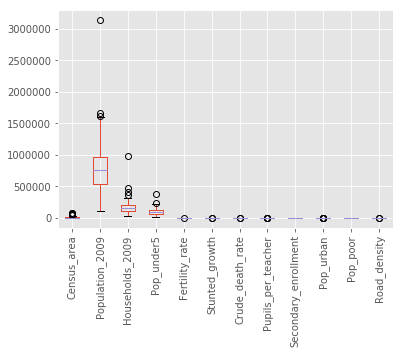

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
cs.plot(kind='box', rot=90)

In [8]:
cs.Former_province.value_counts()

Rift Valley      14
Eastern           8
Nyanza            6
Coast             6
Central           5
Western           4
North Eastern     3
Nairobi           1
Name: Former_province, dtype: int64

In [9]:
#cs.Former_province = cs.Former_province.astype('category')
#cs['Former_province_code'] = cs.Former_province.cat.codes
#cs.info()

In [10]:
# Drop unrequired features
cs_numeric = cs.drop(['County_name','Former_province', 'Census_area'], axis=1)

Text(0, 0.5, 'inertia_')

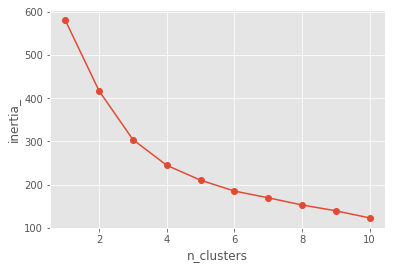

In [11]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

scaler = RobustScaler()
cs_trans = scaler.fit_transform(cs_numeric)

ks = range(1,11)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(cs_trans)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('n_clusters')
plt.ylabel('inertia_')

Text(0.5, 1.0, 'No Scaling')

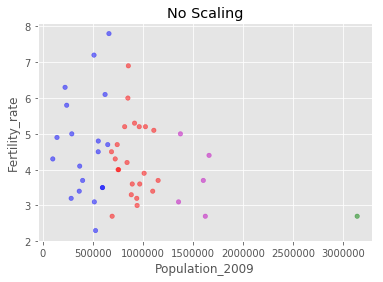

In [12]:
model = KMeans(n_clusters=4)
model.fit(cs_numeric)
cs['Cluster'] = model.predict(cs_numeric)
Cluster_to_Color = {0:'b', 1:'g', 2:'r', 3:'m', 4:'c', 5:'y', 6:'k', 7:'orange'}
cs['Color'] = cs.Cluster.map(Cluster_to_Color)
color = cs['Color']
cs.plot(kind='scatter', x='Population_2009', y='Fertility_rate', c=color, alpha=0.5)
plt.title('No Scaling')

Text(0.5, 1.0, 'Scaling')

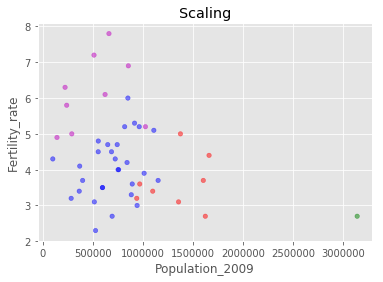

In [13]:
model = KMeans(n_clusters=4)
model.fit(cs_trans)
cs['Cluster'] = model.predict(cs_trans)
Cluster_to_Color = {0:'b', 1:'g', 2:'r', 3:'m', 4:'c', 5:'y', 6:'k', 7:'orange'}
cs['Color'] = cs.Cluster.map(Cluster_to_Color)
color = cs['Color']
cs.plot(kind='scatter', x='Population_2009', y='Fertility_rate', c=color, alpha=0.5)
plt.title('Scaling')

In [14]:
counties = cs.County_name
clusters = cs.Cluster
df = pd.DataFrame({'County': counties, 'Cluster': clusters})
print(df.sort_values('Cluster'))

                    County  Cluster
County_id                          
17                 Makueni        0
31                Laikipia        0
30                 Baringo        0
29                   Nandi        0
28         Elgeyo Marakwet        0
27             Uasin Gishu        0
26             Trans Nzoia        0
35                 Kericho        0
46                 Nyamira        0
36                   Bomet        0
21                Murang'a        0
20               Kirinyaga        0
19                   Nyeri        0
18               Nyandarua        0
34                 Kajiado        0
33                   Narok        0
15                   Kitui        0
2                    Kwale        0
3                   Kilifi        0
45                   Kisii        0
5                     Lamu        0
6             Taita Taveta        0
44                  Migori        0
38                  Vihiga        0
43                Homa Bay        0
41                   Siaya  

In [15]:
import geopandas as gpd
County_census = gpd.read_file('shapefiles\Counties.shp')

In [16]:
County_census.columns = ['County', 'Shape_length', 'Shape_area', 'Census_area', 'geometry']

In [17]:
County_cluster = pd.merge(County_census, df, on='County')

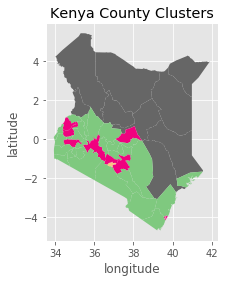

In [18]:
County_cluster.plot(column='Cluster', legend=False, cmap='Accent')
plt.title('Kenya County Clusters')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.savefig('CountyClusters.png')

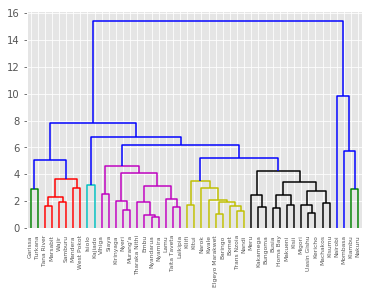

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
county_list = counties.tolist()
mergings = linkage(cs_trans, method='complete')
dendrogram(mergings, labels=county_list, color_threshold=5, leaf_rotation=90, leaf_font_size=6)
plt.savefig('Dendrogram.png')

In [20]:
from scipy.cluster.hierarchy import fcluster
for l in range(1,11):
    labels = fcluster(mergings, l, criterion='distance')
    pairs = pd.DataFrame({'label': labels, 'county': counties})
    print(pairs.sort_values('label'))

           label           county
County_id                        
7              1          Garissa
23             2          Turkana
4              3       Tana River
10             4         Marsabit
8              5            Wajir
25             6          Samburu
9              7          Mandera
24             8       West Pokot
11             9           Isiolo
34            10          Kajiado
38            11           Vihiga
41            12            Siaya
19            13            Nyeri
21            14         Murang'a
20            15        Kirinyaga
14            16             Embu
46            16          Nyamira
18            16        Nyandarua
13            17    Tharaka Nithi
6             18     Taita Taveta
31            19         Laikipia
5             20             Lamu
3             21           Kilifi
15            22            Kitui
28            23  Elgeyo Marakwet
30            24          Baringo
26            25      Trans Nzoia
29            

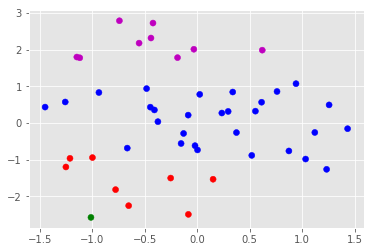

In [21]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)
transformed = model.fit_transform(cs_trans)
xs = transformed[:,0]
ys = transformed[:,1]
color = cs.Color
plt.scatter(xs, ys, c=color)

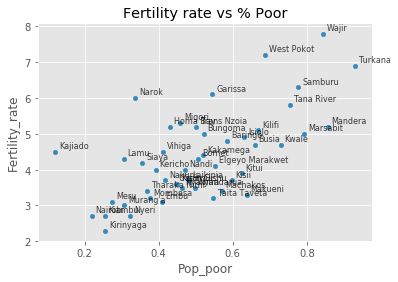

In [27]:
cs.plot(kind='scatter', x='Pop_poor', y='Fertility_rate')
plt.title('Fertility rate vs % Poor')

# Annotate the points
xs = cs['Pop_poor']
ys = cs['Fertility_rate']
counties = cs['County_name']
for x, y, company in zip(xs, ys, counties):
    plt.annotate(company, (x+0.01, y+0.1), fontsize=8, alpha=0.75)
